In [231]:
# ## data-question-3
# ### Earthquakes 
# - Nate Silver discusses the difficulty of predicting earthquakes in **The Signal and the Noise**, but are there factors that make an earthquake more likely? 
# - Are there factors that make an earthquake more deadly? 
# - Where would you live if you wanted to eliminate the risk of experiencing an earthquake? 
# - Where would you avoid living?

# Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using *beautifulsoup* and load it to a pandas dataframe. An introduction to the request and beautifulsoup libraries is provided in `TuringAward_soup.ipynb`.

# #### Data cleaning tasks include:
# 1. Replace empty strings with NaN
# 2. Remove the footnotes from the 'Other Source Deaths' column
# 3. Convert Magnitude to a numeric
# 4. Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
# 5. Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

# Feel free to add data after 9/23/2011, but understand that it is not required.
# Add any supplemental data you'd like in order to explore ideas related to earthquake occurrence and effects.


In [232]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS

In [233]:
response = requests.get ('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [234]:
result_text=response.text

In [235]:
print(type(response))
print(type(result_text))

<class 'requests.models.Response'>
<class 'str'>


In [236]:
soup = BS(result_text, 'html.parser')

In [237]:
soup.title

<title>List of deadly earthquakes since 1900 - Wikipedia</title>

In [238]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":840128723,"wgRevisionId":840128723,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 20

In [239]:
table=soup.findAll('table',{'class':'sortable wikitable'})

In [240]:
len(table)

1

In [241]:
print(table)

[<table class="sortable wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths
</th></tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td></td>
<td></td>
<td></td

In [242]:
earthquakedf = pd.read_html(str(table))

In [243]:
earthquakedf

[                    0                                                  1   \
 0         Origin (UTC)  Present-day country and link to Wikipedia article   
 1     1900-05-11 17:23                                              Japan   
 2     1900-07-12 06:25                                             Turkey   
 3     1900-10-29 09:11                                          Venezuela   
 4     1901-02-15 00:00                                              China   
 5     1901-03-31 07:11                                           Bulgaria   
 6     1901-08-09 09:23                                              Japan   
 7     1901-11-15 20:15          New Zealand (see 1901 Cheviot earthquake)   
 8     1902-01-30 14:01                                              Japan   
 9     1902-02-13 09:39                                         Azerbaijan   
 10    1902-03-09 07:46                                             Turkey   
 11    1902-04-19 02:23          Guatemala (see 1902 Guatemala e

In [244]:
earthquakedf = earthquakedf[0]

In [245]:
earthquakedf

,0,1,2,3,4,5,6,7,8,9,10,11
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN


In [246]:
# earthquakedf.rename(columns=earthquakedf.iloc[1])

In [247]:
earthquakedf.columns = earthquakedf.iloc[0]

In [248]:
earthquakedf.reindex(earthquakedf.index.drop(0))

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [249]:
earthquakedf.describe()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
count,1341,1341,1327,1327,1251,1340,374,740,751,1028,561,38
unique,1338,393,1235,1278,434,177,13,143,155,279,203,36
top,1990-04-26 09:37,China,40.000,54.500,35,7.2 Mw,L,1,1,1,1,1
freq,2,133,6,3,112,46,165,156,192,171,61,3


In [250]:
earthquakedf['Other Source Deaths'].unique()

array(['Other Source Deaths', nan, '3500', '8000+', '46', '164[6]',
       '1500[6]', '105000', '1404', '1', '120', '200', '380', '2041',
       '33[8]', '45000[9]', '2489[10]', '26271[11] 26000[12]', '68',
       '231000*[13] 283000*[14] 227898*[15]', '41', '60[16]', '215', '34',
       '295', '79', '189', '1115', '222,517[17]', '521[19]', '42', '2698',
       '181', '15894[20]', '150+', '111+', '601 (as of October 30, 2011)'],
      dtype=object)

In [251]:
earthquakedf[~earthquakedf['Other Source Deaths'].isna()]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
17,1903-04-28,Turkey (see 1903 Manzikert earthquake),39.14,42.65,NaN,7.0 Ms,NaN,NaN,NaN,NaN,NaN,3500
44,1909-01-23,Iran (see 1909 Borujerd earthquake),33,50,NaN,7.3 Muk,NaN,NaN,NaN,NaN,NaN,8000+
50,1909-06-11,France (see 1909 Provence earthquake),43.7,5.4,NaN,6.2 Ms,NaN,NaN,NaN,NaN,NaN,46
67,1912-11-19 13:55,Mexico,19.830,-99.920,15,6.7 Ms,NaN,NaN,NaN,NaN,NaN,164[6]
100,1920-01-04 04:22,Mexico,19.270,-97.080,15,6.2 Ms,L,NaN,NaN,NaN,NaN,1500[6]
117,1923-09-01 02:58,Japan (see 1923 Great Kantō earthquake),35.405,139.084,35,7.9 Muk,"T,F",NaN,NaN,142807,143000,105000
164,1930-07-23 00:08,Italy (see 1930 Irpinia earthquake),41.05,15.367,NaN,6.6 Muk,NaN,NaN,NaN,NaN,NaN,1404
179,1931-06-07 01:30,England (see 1931 Dogger Bank earthquake),54.08,1.5,NaN,6.1 Muk,NaN,NaN,NaN,NaN,NaN,1
196,1933-03-11 01:55,United States (see 1933 Long Beach earthquake),33.63,-118,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,120


In [252]:
earthquakedf.loc[44, 'Other Source Deaths'] = 8000

In [253]:
earthquakedf.loc[67, 'Other Source Deaths'] = 164

In [254]:
earthquakedf.loc[100, 'Other Source Deaths'] = 1500

In [255]:
earthquakedf.loc[959, 'Other Source Deaths'] = 33

In [256]:
earthquakedf.loc[1079, 'Other Source Deaths'] = 45000 

In [257]:
earthquakedf.loc[1083, 'Other Source Deaths'] = 2489

In [258]:
# For any data that has two different estimates, I am averaging the estimates. 

In [259]:
earthquakedf.loc[1207, 'Other Source Deaths'] = (26271+ 26000)/2

In [260]:
earthquakedf.loc[1239, 'Other Source Deaths'] = (231000+283000+227898)/3

In [261]:
earthquakedf.loc[1319, 'Other Source Deaths'] = 60

In [262]:
earthquakedf.loc[1329, 'Other Source Deaths'] = 222517

In [263]:
earthquakedf.loc[1330, 'Other Source Deaths'] = 521

In [264]:
earthquakedf.loc[1336, 'Other Source Deaths'] = 15894

In [265]:
earthquakedf.loc[1337, 'Other Source Deaths'] = 150

In [266]:
earthquakedf.loc[1339, 'Other Source Deaths'] = 111

In [267]:
earthquakedf.loc[1340, 'Other Source Deaths'] = 601

In [268]:
earthquakedf['Other Source Deaths']

0       Other Source Deaths
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
8                       NaN
9                       NaN
10                      NaN
11                      NaN
12                      NaN
13                      NaN
14                      NaN
15                      NaN
16                      NaN
17                     3500
18                      NaN
19                      NaN
20                      NaN
21                      NaN
22                      NaN
23                      NaN
24                      NaN
25                      NaN
26                      NaN
27                      NaN
28                      NaN
29                      NaN
               ...         
1311                    NaN
1312                    NaN
1313                    NaN
1314                    NaN
1315                

In [269]:
earthquakedf['Other Source Deaths'].replace(regex=True,to_replace=r'\D',value=r'')

0             
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17        3500
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
1311       NaN
1312       NaN
1313       NaN
1314       NaN
1315       NaN
1316       NaN
1317       NaN
1318        41
1319        60
1320       NaN
1321       215
1322        34
1323       295
1324       NaN
1325         1
1326        79
1327       189
1328      1115
1329    222517
1330       521
1331        42
1332         1
1333      2698
1334       181
1335       NaN
1336     15894
1337       150
1338       NaN
1339       111
1340       601
Name: Other Source Deaths, Length: 1341, dtype: object

In [270]:
earthquakedf['Other Source Deaths']

0       Other Source Deaths
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
8                       NaN
9                       NaN
10                      NaN
11                      NaN
12                      NaN
13                      NaN
14                      NaN
15                      NaN
16                      NaN
17                     3500
18                      NaN
19                      NaN
20                      NaN
21                      NaN
22                      NaN
23                      NaN
24                      NaN
25                      NaN
26                      NaN
27                      NaN
28                      NaN
29                      NaN
               ...         
1311                    NaN
1312                    NaN
1313                    NaN
1314                    NaN
1315                

In [271]:
earthquakedf

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN


In [272]:
earthquakedf['Magnitude Numeric'], earthquakedf['Magnitude Units'] = earthquakedf['Magnitude'].str.split(' ', 1).str

In [273]:
earthquakedf

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Magnitude Numeric,Magnitude Units
0,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Magnitude,NaN
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN,7.0,MJMA
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN,5.9,Muk
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN,7.7,Mw
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN,6.5,Ms
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN,6.4,Muk
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN,7.2,Mw
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN,6.8,Ms
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN,6.9,Ms
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN,6.9,Muk


In [274]:
earthquakedf=earthquakedf.drop(earthquakedf.index[0])

In [275]:
earthquakedf.drop('Magnitude', axis=1)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Magnitude Numeric,Magnitude Units
1,1900-05-11 17:23,Japan,38.700,141.100,5,NaN,NaN,NaN,NaN,NaN,NaN,7.0,MJMA
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,NaN,NaN,NaN,140,NaN,NaN,5.9,Muk
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,NaN,NaN,NaN,NaN,NaN,NaN,7.7,Mw
4,1901-02-15 00:00,China,26.000,100.100,0,NaN,NaN,NaN,NaN,NaN,NaN,6.5,Ms
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,NaN,NaN,NaN,4,NaN,NaN,6.4,Muk
6,1901-08-09 09:23,Japan,40.500,142.500,35,T,NaN,NaN,NaN,NaN,NaN,7.2,Mw
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,NaN,NaN,NaN,1,NaN,NaN,6.8,Ms
8,1902-01-30 14:01,Japan,40.500,141.300,35,NaN,NaN,NaN,1,NaN,NaN,6.9,Ms
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,NaN,NaN,NaN,86,NaN,NaN,6.9,Muk
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,NaN,NaN,NaN,4,NaN,NaN,5.5,Muk


In [276]:
earthquakedf

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Magnitude Numeric,Magnitude Units
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN,7.0,MJMA
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN,5.9,Muk
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN,7.7,Mw
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN,6.5,Ms
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN,6.4,Muk
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN,7.2,Mw
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN,6.8,Ms
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN,6.9,Ms
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN,6.9,Muk
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN,5.5,Muk


In [277]:
earthquakedf.columns.to_series().groupby(earthquakedf.dtypes).groups

{dtype('O'): Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
        'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
        'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
        'EM-DAT Total Deaths', 'Other Source Deaths', 'Magnitude Numeric',
        'Magnitude Units'],
       dtype='object', name=0)}

In [278]:
import numpy as np

In [279]:
# 439 (just take what is before plus sign)

In [280]:
earthquakedf['Other Source Deaths'].unique()

array([nan, '3500', 8000, '46', 164, 1500, '105000', '1404', '1', '120',
       '200', '380', '2041', 33, 45000, 2489, 26135.5, '68',
       247299.33333333334, '41', 60, '215', '34', '295', '79', '189',
       '1115', 222517, 521, '42', '2698', '181', 15894, 150, 111, 601],
      dtype=object)

In [281]:
earthquakedf['Other Source Deaths'].describe()

count     37
unique    35
top        1
freq       3
Name: Other Source Deaths, dtype: object

In [282]:
earthquakedf['Magnitude Numeric'] = pd.to_numeric(earthquakedf['Magnitude Numeric'], errors='coerce')

In [283]:
# earthquakedf['Magnitude Numeric'] = pd.to_numeric(earthquakedf['Magnitude Numeric'], errors='coerce')
earthquakedf['Other Source Deaths Numeric'] = pd.to_numeric(earthquakedf['Other Source Deaths'], errors = 'coerce')
earthquakedf['EM-DAT Total Deaths Numeric'] = pd.to_numeric(earthquakedf['EM-DAT Total Deaths'], errors = 'coerce')
earthquakedf['PDE Total Deaths Numeric'] = pd.to_numeric(earthquakedf['PDE Total Deaths'], errors = 'coerce')
earthquakedf['Utsu Total Deaths Numeric'] = pd.to_numeric(earthquakedf['Utsu Total Deaths'], errors = 'coerce')

In [284]:
earthquakedf

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN,7.2,Mw,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0


In [285]:
earthquakedf = earthquakedf.drop('Other Source Deaths', 1)

In [286]:
earthquakedf = earthquakedf.drop('EM-DAT Total Deaths', 1)

In [287]:
earthquakedf = earthquakedf.drop('PDE Total Deaths', 1)

In [288]:
earthquakedf = earthquakedf.drop('Utsu Total Deaths', 1)

In [289]:
earthquakedf

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,7.2,Mw,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0


In [290]:
earthquakedf['Max']=earthquakedf[['PDE Total Deaths Numeric','Utsu Total Deaths Numeric','EM-DAT Total Deaths Numeric', 'Other Source Deaths Numeric']].apply(np.max,axis=1)

In [291]:
earthquakedf

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0,4.0
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,7.2,Mw,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0,1.0
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0,1.0
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0,86.0
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0,4.0


In [292]:
earthquakedf = earthquakedf.rename(index=str, columns={"Present-day country and link to Wikipedia article": "Country"})

In [293]:
earthquakedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 1 to 1340
Data columns (total 15 columns):
Origin (UTC)                   1340 non-null object
Country                        1340 non-null object
Lat                            1326 non-null object
Long                           1326 non-null object
Depth (km)                     1250 non-null object
Magnitude                      1339 non-null object
Secondary Effects              373 non-null object
PDE Shaking Deaths             739 non-null object
Magnitude Numeric              1339 non-null float64
Magnitude Units                1338 non-null object
Other Source Deaths Numeric    37 non-null float64
EM-DAT Total Deaths Numeric    559 non-null float64
PDE Total Deaths Numeric       750 non-null float64
Utsu Total Deaths Numeric      1027 non-null float64
Max                            1273 non-null float64
dtypes: float64(6), object(9)
memory usage: 167.5+ KB


In [294]:
# def getrid_ofunits(earthquakedf ['Magnitude']):
#     if earthquakedf ['Magnitude'].endswith(" MJMA"): s = s[:-5]
#     if earthquakedf ['Magnitude'].startswith(" Muk"): s = s[:-4]
#     if earthquakedf ['Magnitude'].endswith(" Mw"): s = s[:-3]
#     if earthquakedf ['Magnitude'].startswith(" Ms"): s = s[:-3]
#     if earthquakedf ['Magnitude'].endswith(" ML"): s = s[:-3]
#     return getrid_ofunits

In [295]:
earthquakedf['Max'].mean()

2478.3527101335426

In [296]:
earthquakedf['Max'].count()

1273

In [297]:
earthquakedf['Max'].min()

0.0

In [298]:
earthquakedf['Max'].max()

655237.0

In [299]:
earthquakedf['Max'].var()

576100226.2976725

In [300]:
earthquakedf['Max'].std()

24002.087957043914

In [301]:
earthquakedf['Max'].skew()

19.435862234866388

In [302]:
earthquakedf.describe()

,Magnitude Numeric,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max
count,1339.000000,37.000000,559.000000,750.000000,1027.000000,1273.000000
mean,6.397087,18597.995495,3319.277281,2016.632000,1580.013632,2478.352710
std,0.968039,55767.167166,18661.237548,26859.406362,12620.035353,24002.087957
min,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.700000,68.000000,3.000000,1.000000,2.000000,2.000000
50%,6.400000,215.000000,17.000000,4.000000,11.000000,10.000000
75%,7.100000,2489.000000,181.500000,24.000000,103.000000,92.000000
max,9.500000,247299.333333,242000.000000,655237.000000,242800.000000,655237.000000


In [303]:
earthquakedf.describe(include='all')

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max
count,1340,1340,1326,1326,1250,1339,373,739,1339.000000,1338,37.000000,559.000000,750.000000,1027.000000,1273.000000
unique,1337,392,1234,1277,433,176,12,142,NaN,10,NaN,NaN,NaN,NaN,NaN
top,1990-05-05 07:21,China,40.000,54.500,35,7.2 Mw,L,1,NaN,Mw,NaN,NaN,NaN,NaN,NaN
freq,2,133,6,3,112,46,165,156,NaN,821,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.397087,NaN,18597.995495,3319.277281,2016.632000,1580.013632,2478.352710
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.968039,NaN,55767.167166,18661.237548,26859.406362,12620.035353,24002.087957
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.700000,NaN,68.000000,3.000000,1.000000,2.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.400000,NaN,215.000000,17.000000,4.000000,11.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.100000,NaN,2489.000000,181.500000,24.000000,103.000000,92.000000


In [304]:
earthquakedf

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0,140.0
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0,4.0
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,7.2,Mw,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0,1.0
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0,1.0
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0,86.0
10,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0,4.0


In [305]:
import matplotlib.pyplot as plt

In [306]:
earthquakedf['Lat'] = pd.to_numeric(earthquakedf['Lat'], errors = 'coerce')
earthquakedf['Long'] = pd.to_numeric(earthquakedf['Long'], errors = 'coerce')
earthquakedf['Depth (km)'] = pd.to_numeric(earthquakedf['Depth (km)'], errors = 'coerce')

In [307]:
earthquakedf

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max
1,1900-05-11 17:23,Japan,38.7000,141.1000,5.0,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.3000,43.1000,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0,140.0
3,1900-10-29 09:11,Venezuela,11.0000,-66.0000,0.0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.0000,100.1000,0.0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.4000,28.7000,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0,4.0
6,1901-08-09 09:23,Japan,40.5000,142.5000,35.0,7.2 Mw,T,NaN,7.2,Mw,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.0000,173.0000,0.0,6.8 Ms,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0,1.0
8,1902-01-30 14:01,Japan,40.5000,141.3000,35.0,6.9 Ms,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0,1.0
9,1902-02-13 09:39,Azerbaijan,40.7000,48.6000,15.0,6.9 Muk,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0,86.0
10,1902-03-09 07:46,Turkey,40.7000,33.6000,NaN,5.5 Muk,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0,4.0


In [315]:
earthquakedf['Country'].str.replace(r" ?\([^)]+\)", "",regex=True)

1                   Japan
2                  Turkey
3               Venezuela
4                   China
5                Bulgaria
6                   Japan
7             New Zealand
8                   Japan
9              Azerbaijan
10                 Turkey
11              Guatemala
12                  China
13                  China
14              Australia
15             Uzbekistan
16      Judea and Samaria
17                 Turkey
18                 Turkey
19                 Greece
20                   Iran
21                 Taiwan
22                 Greece
23                  China
24                 Taiwan
25                  India
26                Albania
27                  Japan
28                  Italy
29                 Greece
30                Ecuador
              ...        
1311                China
1312              Algeria
1313               Greece
1314                Japan
1315                China
1316               Greece
1317                China
1318        

In [317]:
fix2=earthquakedf['Country'].str.partition('(')
earthquakedf['Country']=fix2.iloc[:,0]

In [318]:
earthquakedf

,Origin (UTC),Country,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,Magnitude Numeric,Magnitude Units,Other Source Deaths Numeric,EM-DAT Total Deaths Numeric,PDE Total Deaths Numeric,Utsu Total Deaths Numeric,Max
1,1900-05-11 17:23,Japan,38.7000,141.1000,5.0,7.0 MJMA,NaN,NaN,7.0,MJMA,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.3000,43.1000,NaN,5.9 Muk,NaN,NaN,5.9,Muk,NaN,NaN,NaN,140.0,140.0
3,1900-10-29 09:11,Venezuela,11.0000,-66.0000,0.0,7.7 Mw,NaN,NaN,7.7,Mw,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.0000,100.1000,0.0,6.5 Ms,NaN,NaN,6.5,Ms,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.4000,28.7000,NaN,6.4 Muk,NaN,NaN,6.4,Muk,NaN,NaN,NaN,4.0,4.0
6,1901-08-09 09:23,Japan,40.5000,142.5000,35.0,7.2 Mw,T,NaN,7.2,Mw,NaN,NaN,NaN,NaN,NaN
7,1901-11-15 20:15,New Zealand,-43.0000,173.0000,0.0,6.8 Ms,NaN,NaN,6.8,Ms,NaN,NaN,NaN,1.0,1.0
8,1902-01-30 14:01,Japan,40.5000,141.3000,35.0,6.9 Ms,NaN,NaN,6.9,Ms,NaN,NaN,NaN,1.0,1.0
9,1902-02-13 09:39,Azerbaijan,40.7000,48.6000,15.0,6.9 Muk,NaN,NaN,6.9,Muk,NaN,NaN,NaN,86.0,86.0
10,1902-03-09 07:46,Turkey,40.7000,33.6000,NaN,5.5 Muk,NaN,NaN,5.5,Muk,NaN,NaN,NaN,4.0,4.0


In [319]:
earthquakedf['Country'].unique()

array(['Japan', 'Turkey', 'Venezuela', 'China', 'Bulgaria',
       'New Zealand ', 'Azerbaijan', 'Guatemala ', 'Australia',
       'Uzbekistan', 'Judea and Samaria', 'Turkey ', 'Greece', 'Iran',
       'Taiwan', 'Taiwan ', 'India', 'Albania', 'Italy ', 'Ecuador ',
       'United States ', 'Chile ', 'Indonesia', 'Jamaica ', 'Mexico',
       'Philippines', 'Tajikistan ', 'Iran ', 'Portugal', 'France ',
       'Pakistan', 'Algeria', 'Kazakhstan ', 'Kyrgyzstan', 'Iceland',
       'Burma', 'Peru', 'Italy', 'United States', 'El Salvador',
       'Colombia', 'China ', 'Russian Federation', 'Puerto Rico ',
       'Papua New Guinea', 'Georgia ', 'Argentina ', 'Eritrea ', 'Japan ',
       'Bangladesh', 'Ecuador', 'Philippines ', 'Nicaragua', 'Argentina',
       'Mandatory Palestine and Transjordan ', 'Chile', 'Turkmenistan ',
       'Saint Pierre and Miquelon ', 'Kingdom of Yugoslavia',
       'Nicaragua ', 'Armenia', 'England ', 'Solomon Islands', 'Cuba',
       'Mexico ', 'Greece ', 'Nepal ', 

In [366]:
earthquakedf['Max'].sort_values(ascending = False)


584     655237.0
1239    297200.0
103     235502.0
1329    222517.0
141     200000.0
117     143000.0
303     110000.0
1309     88287.0
1254     87351.0
42       82000.0
499      70000.0
210      60000.0
1079     45000.0
875      45000.0
231      32968.0
80       32610.0
1207     31000.0
226      30000.0
833      25000.0
629      25000.0
565      23000.0
1126     20023.0
25       20000.0
34       20000.0
1336     15894.0
492      15621.0
88       15000.0
473      15000.0
40       15000.0
394      13100.0
          ...   
498          NaN
500          NaN
566          NaN
579          NaN
585          NaN
588          NaN
667          NaN
680          NaN
715          NaN
770          NaN
832          NaN
855          NaN
1122         NaN
1153         NaN
1172         NaN
1192         NaN
1193         NaN
1200         NaN
1211         NaN
1215         NaN
1216         NaN
1218         NaN
1293         NaN
1294         NaN
1316         NaN
1317         NaN
1320         NaN
1324         N

In [346]:
fix3=earthquakedf['Country'].str.partition(',')
earthquakedf['Country']=fix3.iloc[:,0]

In [325]:
import seaborn as sns

Text(0.5,1,'Magnitude vs. Total Deaths')

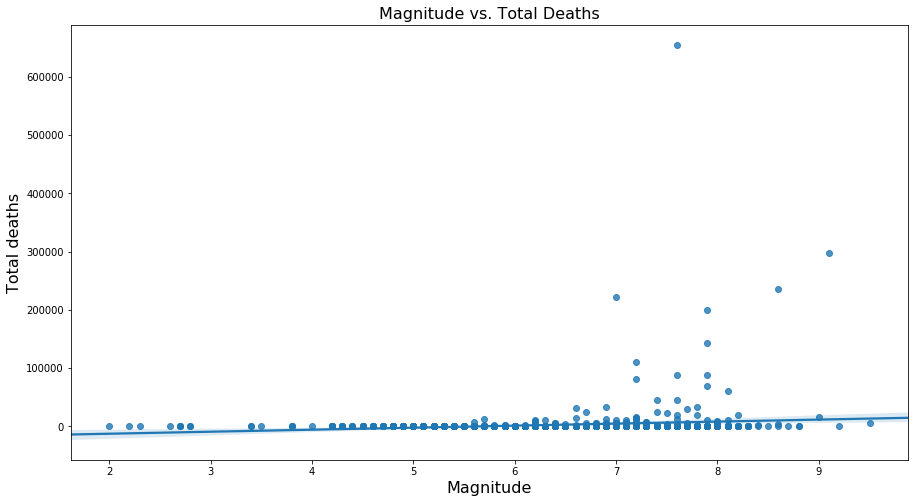

In [347]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x= "Magnitude Numeric", y = "Max", data=earthquakedf)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Total deaths', fontsize=16)
plt.title("Magnitude vs. Total Deaths", fontsize=16)

Text(0.5,1,'Magnitude by Country')

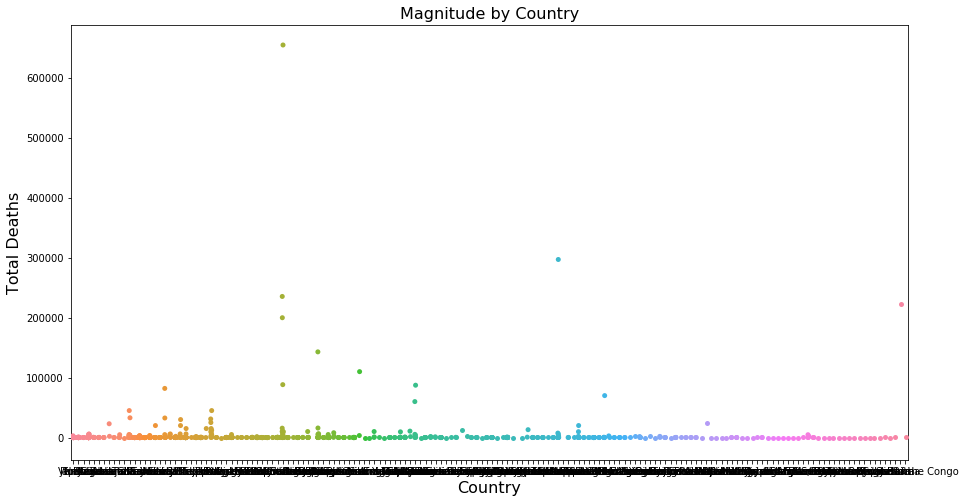

In [363]:
plt.figure(figsize=(15,8))
ax = sns.stripplot(x= "Country", y = "Max", data=earthquakedf)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title("Magnitude by Country", fontsize=16)

Text(0.5,1,'Magnitude by Country')

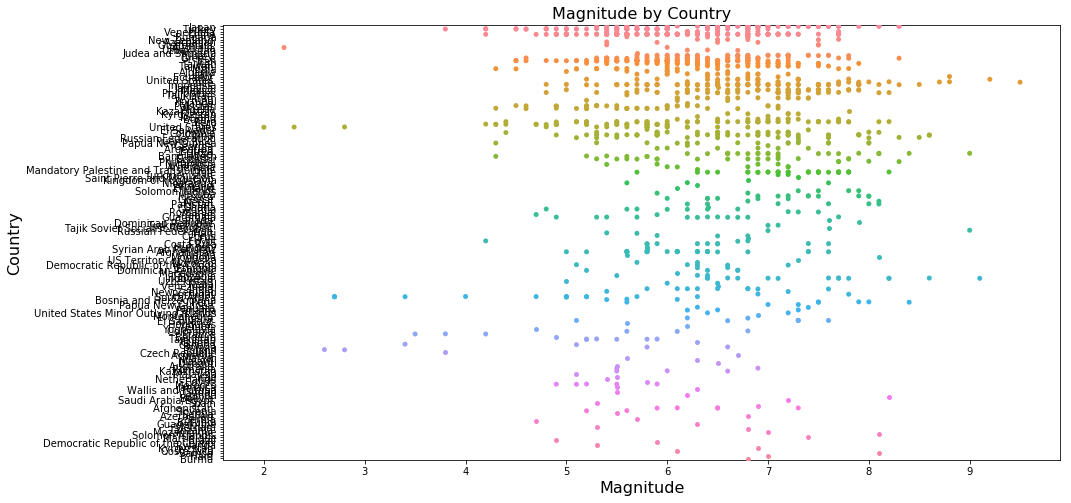

In [353]:
plt.figure(figsize=(15,8))
ax = sns.stripplot(x= "Magnitude Numeric", y = "Country", data=earthquakedf)
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.title("Magnitude by Country", fontsize=16)

Text(0.5,1,'Magnitude by Country')

<Figure size 1080x576 with 0 Axes>

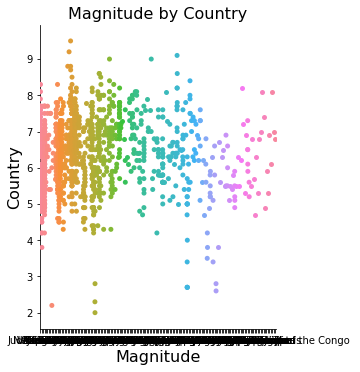

In [361]:
plt.figure(figsize=(15,8))
sns.catplot(x="Country", y="Magnitude Numeric", data=earthquakedf);
plt.xlabel('Magnitude', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.title("Magnitude by Country", fontsize=16) 

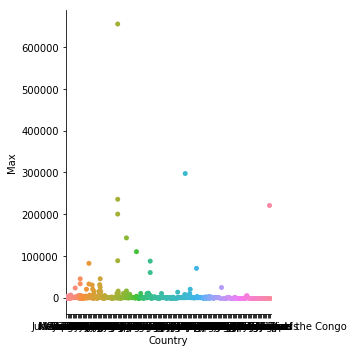

In [368]:
sns.catplot(x="Country", y="Max", kind="swarm", data=earthquakedf);
